# The exercise - Grouped Standardizer

Our goal might be to implement a groupby standardizer.

a standardizer subtract the average of one or more columns, and divide the data by their standard deviation.

The standard **standardizer** does use the whole data average, but we might want to do this operation separatedly on different groups, for example by country.

Assuming that all the groupby categories are present in the traning data, try to implement it


In [2]:
import pandas as pd
import seaborn
import pylab as plt
import numpy as np
from pandas.api.types import is_numeric_dtype

In [3]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(url)

# Best attempt 'till now

If I apply `trasform` to all the **DF** it works well

In [197]:
iris = pd.read_csv(url)
#On the entrie df w/o grouping it works well
iris = iris.iloc[:,:-1].transform(lambda x: (x - np.mean(x))/np.std(x))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


If I manually extract the group from the `groupby` output and trasform it it works.

In [201]:
iris = pd.read_csv(url)
#If I manually extract the group it work perfectly
setosa = iris.groupby('species').get_group('setosa')
setosa = setosa._get_numeric_data().transform(lambda x: (x - np.mean(x))/np.std(x))
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.269382,0.191870,-0.360636,-0.440924
1,-0.303771,-1.140559,-0.360636,-0.440924
2,-0.876924,-0.607588,-0.942306,-0.440924
3,-1.163501,-0.874073,0.221035,-0.440924
4,-0.017195,0.458355,-0.360636,-0.440924


(array([ 5.,  0., 29.,  0.,  7.,  0.,  7.,  0.,  1.,  1.]),
 array([-1.39945388, -0.92018885, -0.44092382,  0.0383412 ,  0.51760623,
         0.99687125,  1.47613628,  1.95540131,  2.43466633,  2.91393136,
         3.39319638]),
 <a list of 10 Patch objects>)

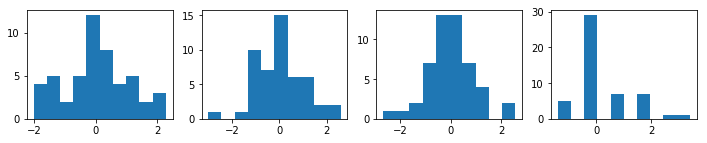

In [192]:
fig, axes = plt.subplots(ncols=4, figsize=(12,2))
axes[0].hist('sepal_length', data=setosa)
axes[1].hist('sepal_width', data=setosa)
axes[2].hist('petal_length', data=setosa)
axes[3].hist('petal_width', data=setosa)

In the moment that I try to apply the `trasform` on every groups iterating them it doesn't modify the original **DF** `iris`.
Does it modify a certain copy? like assignemt y value and not by reference.

In [190]:
iris = pd.read_csv(url)
iris = iris.groupby('species')
for key, group in iris:
    group = group._get_numeric_data().transform(lambda x: (x - np.mean(x))/np.std(x))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


# Attempt to extract through location 
I try to extract numerical column and the categorical column to be used to make the groupby.
I fail trying to merge those Dataframe because they do not share any index or column.

In [4]:
is_number = np.vectorize(lambda x: is_numeric_dtype(x))
num_cols = is_number(iris.dtypes) #Extracting the booleand mask for numerical columns in the DataFrame
numeric_columns_df = iris.iloc[:,num_cols] #Extracting numerical columns
grouping_column_df = iris.loc[:,'species'] #Ectracting the Column I want to use to make the grouping

#I DON'T KNOW OVER WHICH VALUE I SHOULD MANAGE THE MERGING
#pd.merge(grouping_column_df, numeric_columns_df, on='index', how='left')

# Is good but there isn't the *'species'* column
If I do this way I lose the information about the species.
If I try to make the groupby using "as_index = False" it raises error because it keepS a non numerical column which it is not compatible with the lambda function used to normalize the data

In [84]:
stdz_iris = iris.groupby('species').apply(lambda x: (x - np.mean(x))/np.std(x))
stdz_iris.head()

Exception: Must produce aggregated value

In [6]:
stdz_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,1.570596e-15,-9.858780e-16,-2.590520e-17,8.200847e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-2.681541e+00,-3.005959e+00,-2.708582e+00,-2.302404e+00
25%,-6.472601e-01,-6.075875e-01,-7.414799e-01,-4.634232e-01
50%,-1.719459e-02,8.143950e-02,8.785611e-02,-1.328122e-01
75%,5.559584e-01,7.078972e-01,7.074045e-01,8.266064e-01
max,2.275417e+00,2.590242e+00,2.547718e+00,3.393196e+00


ValueError: too many values to unpack (expected 2)

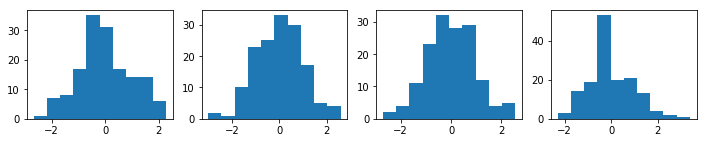

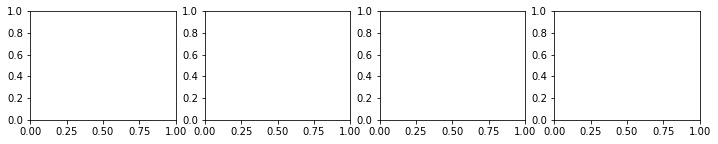

In [11]:
#Very poor plots
fig, axes = plt.subplots(ncols=4, figsize=(12,2))
axes[0].hist('sepal_length', data=stdz_iris)
axes[1].hist('sepal_width', data=stdz_iris)
axes[2].hist('petal_length', data=stdz_iris)
axes[3].hist('petal_width', data=stdz_iris)


# Attempt going through different groups
I would have liked to apply the lambda function to every group but I wasn't able to obtain nothing.
 * what is the difference between `pandas.core.frame.DataFrame` and normal `pandas.DataFrame`???
 * Why I can't see any modifiction?

In [101]:
gr_iris = iris.groupby('species', as_index=False)
for key, group in gr_iris:
    print(type(group))
    group = group._get_numeric_data().apply(lambda x: (x - np.mean(x))/np.std(x)) #Why it's not modified ?????
gr_iris.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [145]:
def fun(x):
    pd.DataFrame._get_numeric_data(x).apply(lambda x: x +10)

iris = pd.read_csv(url)
    
gr_iris = iris.groupby('species', as_index=False)
for key, group in gr_iris:
    group = group.iloc[:,:-1].transform(lambda x: x + np.mean(x))

iris.head()
#iris._get_numeric_data().apply(lambda x: x +10)

#iris.groupby('species').apply(lambda x: pd.DataFrame._get_numeric_data(x))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [144]:
help(pd.DataFrame.transform)

Help on function transform in module pandas.core.frame:

transform(self, func, axis=0, *args, **kwargs)
    Call ``func`` on self producing a DataFrame with transformed values
    and that has the same axis length as self.
    
    .. versionadded:: 0.20.0
    
    Parameters
    ----------
    func : function, str, list or dict
        Function to use for transforming the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply.
    
        Accepted combinations are:
    
        - function
        - string function name
        - list of functions and/or function names, e.g. ``[np.exp. 'sqrt']``
        - dict of axis labels -> functions, function names or list of such.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        If 0 or 'index': apply function to each column.
        If 1 or 'columns': apply function to each row.
    *args
        Positional arguments to pass to `func`.
    **kwargs
        Keyword arguments to pass to

# -----------------------------------------------------------------------

In [78]:
stds = iris.groupby('species').std()
means = iris.groupby('species').mean()
pd.merge(stds,means, on='species', suffixes=['_std', '_mean'])

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,sepal_length_mean,sepal_width_mean,petal_length_mean,petal_width_mean
species,,,,,,,,
setosa,0.352490,0.379064,0.173664,0.105386,5.006,3.428,1.462,0.246
versicolor,0.516171,0.313798,0.469911,0.197753,5.936,2.770,4.260,1.326
virginica,0.635880,0.322497,0.551895,0.274650,6.588,2.974,5.552,2.026


In [81]:
pd.concat([stds, means], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,sepal_length,sepal_width,petal_length,petal_width
species,,,,,,,,
setosa,0.352490,0.379064,0.173664,0.105386,5.006,3.428,1.462,0.246
versicolor,0.516171,0.313798,0.469911,0.197753,5.936,2.770,4.260,1.326
virginica,0.635880,0.322497,0.551895,0.274650,6.588,2.974,5.552,2.026


In [73]:
iris.apply(lambda x: print(x.name))

sepal_length
sepal_width
petal_length
petal_width
species


sepal_length    None
sepal_width     None
petal_length    None
petal_width     None
species         None
dtype: object